In [10]:
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data/winequality.csv")
print(data.shape)
X = data.iloc[:,:11]
y = data.iloc[:,11]
x = X.values  
y = y.values 
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)

train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.15)
train_X,val_X,train_y,val_y = train_test_split(train_X, train_y, random_state=0, test_size=0.2)

(3918, 13)


In [3]:
K_accuracy = dict()

In [4]:
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X,train_y)
    predicted= model.predict(val_X)
    val_accuracy = np.sum(predicted == val_y) / val_y.shape[0]
    K_accuracy[k] = val_accuracy

k =  1  accuracy =  0.512012012012012
k =  2  accuracy =  0.43843843843843844
k =  3  accuracy =  0.44744744744744747
k =  4  accuracy =  0.45345345345345345
k =  5  accuracy =  0.43843843843843844
k =  6  accuracy =  0.44894894894894893
k =  7  accuracy =  0.4369369369369369
k =  8  accuracy =  0.44144144144144143
k =  9  accuracy =  0.43093093093093093
k =  10  accuracy =  0.44894894894894893
k =  11  accuracy =  0.44144144144144143
k =  12  accuracy =  0.45045045045045046
k =  13  accuracy =  0.4369369369369369
k =  14  accuracy =  0.42492492492492495
k =  15  accuracy =  0.44144144144144143
k =  16  accuracy =  0.43243243243243246
k =  17  accuracy =  0.4444444444444444
k =  18  accuracy =  0.43543543543543545
k =  19  accuracy =  0.43843843843843844
k =  20  accuracy =  0.44294294294294295
k =  21  accuracy =  0.4444444444444444
k =  22  accuracy =  0.44144144144144143
k =  23  accuracy =  0.44144144144144143
k =  24  accuracy =  0.43843843843843844
k =  25  accuracy =  0.44444444

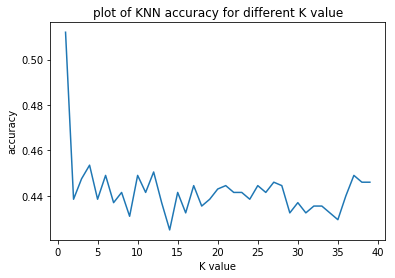

In [6]:
for k,v in K_accuracy.items():
    print("k = ",k," accuracy = ",v)

plt.plot(range(1,40),K_accuracy.values())
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.title('plot of KNN accuracy for different K value')
plt.show()

In [7]:
sorted_K_accuracy = sorted(K_accuracy.items(), key=lambda kv: kv[1],reverse=True)
for k,v in sorted_K_accuracy:
    print("k = ",k," accuracy = ",v)


k =  1  accuracy =  0.512012012012012
k =  4  accuracy =  0.45345345345345345
k =  12  accuracy =  0.45045045045045046
k =  6  accuracy =  0.44894894894894893
k =  10  accuracy =  0.44894894894894893
k =  37  accuracy =  0.44894894894894893
k =  3  accuracy =  0.44744744744744747
k =  27  accuracy =  0.44594594594594594
k =  38  accuracy =  0.44594594594594594
k =  39  accuracy =  0.44594594594594594
k =  17  accuracy =  0.4444444444444444
k =  21  accuracy =  0.4444444444444444
k =  25  accuracy =  0.4444444444444444
k =  28  accuracy =  0.4444444444444444
k =  20  accuracy =  0.44294294294294295
k =  8  accuracy =  0.44144144144144143
k =  11  accuracy =  0.44144144144144143
k =  15  accuracy =  0.44144144144144143
k =  22  accuracy =  0.44144144144144143
k =  23  accuracy =  0.44144144144144143
k =  26  accuracy =  0.44144144144144143
k =  36  accuracy =  0.43993993993993996
k =  2  accuracy =  0.43843843843843844
k =  5  accuracy =  0.43843843843843844
k =  19  accuracy =  0.438438

In [13]:
start = time.clock()
model = KNeighborsClassifier(n_neighbors=sorted_K_accuracy[0][0])
model.fit(train_X,train_y)
elapsed = (time.clock() - start)
print("knn model accuracy: ",accuracy_score(model.predict(test_X),test_y),"time used: ",elapsed)

knn model accuracy:  0.4965986394557823 time used:  0.005276900000012574


C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
